# Chapter 2

Load the data

In [1]:
from tensorflow.keras.datasets import mnist

Split the data

In [2]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


In [4]:
print(test_images.shape)
print(len(test_labels))
print(test_labels)


(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


The network architecrure

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
    ])

The compilation step

In [7]:
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

Preparing the image data

In [8]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

"Fitting" the model

In [9]:
model.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8716 - loss: 0.4415
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9653 - loss: 0.1180
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9790 - loss: 0.0714
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9852 - loss: 0.0521
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9881 - loss: 0.0404


Using the model to make prediction

In [10]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([8.1655607e-09, 4.4414339e-10, 4.7607800e-06, 4.3063355e-05,
       1.7365779e-11, 7.7064124e-09, 3.7450945e-14, 9.9995065e-01,
       1.3039728e-07, 1.3757794e-06], dtype=float32)

In [11]:
predictions[0].argmax()

7

In [12]:
predictions[0][7]

0.99995065

In [14]:
test_labels[0]

7

Evaluating the model on new data

In [15]:
test_loss , test_acc = model.evaluate(test_images,test_labels)
print(f'test_acc: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.0743
test_acc: 0.9804999828338623


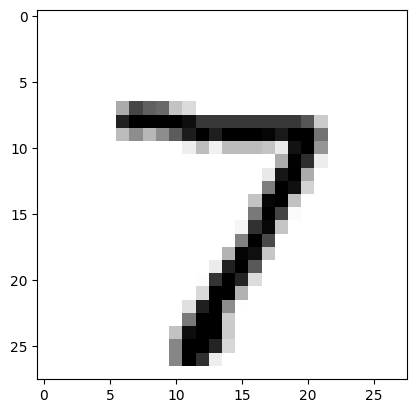

In [45]:
import matplotlib.pyplot as plt
plt.imshow(test_images[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

## Mathematical concepts in tensorflow

Scalars (rank-0 tensors)

In [16]:
import numpy as np

x = np.array(12)
print(x)
print(x.ndim)

12
0


Vectors (rank-1 tensors)

In [17]:
x = np.array([12,3,6,8,14])
print(x)
print(x.ndim)

[12  3  6  8 14]
1


Matrices (rank-2 tensors)

In [18]:
x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])
x.ndim

2

Rank-3 and higher-rank tensors

In [19]:
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])

x.ndim

3

Load the data again

In [20]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Displaying the 4th sample

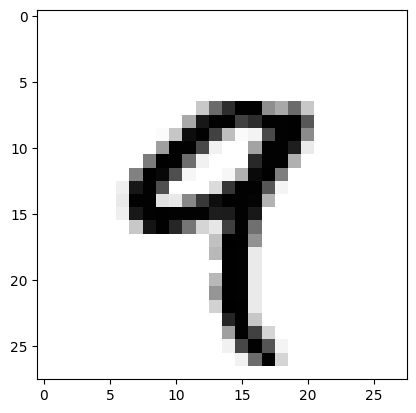

In [46]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [47]:
train_labels[4]

9

# manipulating tensors

Slicing

In [22]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [48]:
my_slice = train_images[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [49]:
my_slice = train_images[10:100,0:28,0:28]
my_slice.shape

(90, 28, 28)

Batches

In [25]:
batch = train_images[0:128]
sec_batch = train_images[128:256]
n = 3
nth_batch = train_images[128 * n:128 * (n+1)]

# Element wise operations

Relu

In [26]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

Addition

In [27]:
def naive_add(x,y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x

In [30]:
import numpy as np
import time

x = np.random.random((20,100))
y = np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z,0.)
print("Took: {0: 0.2f} s".format(time.time() - t0))

Took:  0.01 s


In [31]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x,y)
    z = naive_relu(z)
print("Took: {0: 0.2f} s".format(time.time() - t0))

Took:  2.07 s


Broadcasting

In [38]:
X = np.random.random((32,10))
Y = np.random.random((10,))

Y = np.expand_dims(Y,axis=0)
Y.shape

(1, 10)

In [39]:
Y = np.concatenate([Y]*32,axis=0)
Y.shape

(32, 10)

In [40]:
def naive_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x

In [42]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

Tensor Product

In [43]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [50]:
def naive_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z
            

In [51]:
def naive_matrix_vector_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += naive_vector_dot(x[i,:],y)
        return z

In [52]:
def naive_matrix_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

Tensor reshaping

In [54]:
x = np.array([[0., 1.],
[2., 3.],
[4., 5.]])

x.shape

(3, 2)

In [55]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [56]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

# Simple dense class

In [77]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=-0.1, maxval=0.1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)
    
    @property
    def weights(self):
        return [self.W, self.b]

# Simple sequential class

In [75]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

In [78]:
model = NaiveSequential([
    NaiveDense(input_size=28*28,output_size=512,activation=tf.nn.relu),
    NaiveDense(input_size=512,output_size=10,activation=tf.nn.softmax)
])

assert len(model.weights) == 4

A batch generator

In [88]:
import numpy as np

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [94]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [95]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(learning_rate * g)

In [96]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

# Full training loop

In [97]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(len(images) // batch_size):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss.numpy()}")

In [100]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [101]:
fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 0.5239512324333191
loss at batch 100: 0.5830177068710327
loss at batch 200: 0.45415523648262024
loss at batch 300: 0.5365616083145142
loss at batch 400: 0.5971200466156006
Epoch 1
loss at batch 0: 0.500332772731781
loss at batch 100: 0.5536384582519531
loss at batch 200: 0.4294945001602173
loss at batch 300: 0.5122902393341064
loss at batch 400: 0.5752531290054321
Epoch 2
loss at batch 0: 0.4805361032485962
loss at batch 100: 0.5286386013031006
loss at batch 200: 0.40870386362075806
loss at batch 300: 0.49173131585121155
loss at batch 400: 0.5566877722740173
Epoch 3
loss at batch 0: 0.4636201560497284
loss at batch 100: 0.5070871710777283
loss at batch 200: 0.3909163177013397
loss at batch 300: 0.4740774631500244
loss at batch 400: 0.5407014489173889
Epoch 4
loss at batch 0: 0.44893595576286316
loss at batch 100: 0.4882614016532898
loss at batch 200: 0.37551629543304443
loss at batch 300: 0.4587304890155792
loss at batch 400: 0.5267677307128906
Epoch 5
loss at 

# Evaluate the model

In [103]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions,axis=1)
matches  = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.89
